# **TP FINAL - Fundamentos de Ciencia de Datos**

> Donnarumma, César Julián

> Comision 1











> El dataset principal y de donde parte la idea contiene informacion de los distintos ingresos que existen en la industria de la musica grabada a nivel mundial a traves de los años.

> Lo que se quiere explicar es el comportamiento de la variable con los ingresos por venta de musica por streaming (variable dependiente) a partir de algunas otras variables.

> Pensando en variables explicativas que tengan algun sentido en la vida real (y no solo una fuerte correlacion lineal de datos) y debido a la poca cantidad de columnas que contenia el dataset se decidio acudir a otros sets de datos en busca de variables independientes mas adecuadas para cumplir con el objetivo de la regresion lineal.

> La idea fue pensar en datos como el acceso a internet o la cantidad de dispositivos celulares existentes a traves de los años como posibles explicaciones.

> Inicialmente se pretendia utilizar como variable explicativa a los ingresos por ventas en formato fisico, luego se decidio descartarlo por tener escaso sentido logico.

> La hipotesis es que se podria predecir el comportamiento de los ingresos por ventas en formato streaming con una regresion lineal multiple a partir de:

* Los abonos de telefonia movil: el razonamiento "logico" detras de esto seria que un aumento de chips de celular implica un mayor numero de celulares, que es uno de los dispositivos mas utilizados para escuchar musica lo que facilitaria el acceso a la escucha en formato streaming.

* Acceso a internet de la poblacion mundial: la parte logica seria que un mayor uso de internet por parte de la poblacion facilita el acceso al formato streaming donde los datos se transportan por este medio, es decir la gente tiene mas acceso al formato streaming si tiene acceso a internet.

> Entonces se espera que tanto cuando se incremente el acceso a internet de la poblacion como cuando aumenten los abonos a telefonia movil aumenten los ingresos por venta en formato streaming.

In [ ]:
# Importacion de librerias a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **Preparacion de los datasets**:

> Para cumplir con las consignas se conformara un unico dataset a partir de tres.

> En primer lugar se procedera a la limpieza de datos, rellenado de valores nulos, y transformacion en general de cada uno de los conjuntos de datos cuando se requiera, para luego concatenar todo en una unica unidad.



## dataset_01 (principal): "Ingresos globales por venta de música grabada según segmento"

Informacion: Ingresos globales por venta de música vía streaming, descargas, formato físico, comunicación pública y contratos de sincronización. Alcance temporal: 2001-2020. Unidad de medida: Billones de dólares.

Link: https://www.datos.gob.ar/dataset/cultura-sector-musical/archivo/cultura_f92c0928-26b6-423c-b34c-0d0f4a7fcf7a

Columnas:

* indice_tiempo: Alcance (anual) de la información.

* ingresos_ventas_musica_streaming: Ingresos por venta de música grabada vía streaming.

* ingresos_ventas_musica_descargas: Ingresos por venta de música grabada vía descargas.

* ingresos_ventas_musica_formato_fisico: Ingresos por venta de música grabada en formato físico.

* ingresos_derechos_comunicacion_publica: Ingresos por derechos de transmisión por radio, tv, etc.

* ingresos_contratos_sincronizacion: Ingresos por incorporación de música a contenidos audiovisuales.

In [ ]:
# Importacion del dataset.
ingresos = pd.read_csv("m06_ingresos-globales-ventas-musica-grabada-segmento.csv")

In [ ]:
# Se verifican las columnas detectandose valores nulos.
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   indice_tiempo                           20 non-null     object 
 1   ingresos_ventas_musica_streaming        16 non-null     float64
 2   ingresos_ventas_musica_descargas        17 non-null     float64
 3   ingresos_ventas_musica_formato_fisico   20 non-null     float64
 4   ingresos_derechos_comunicacion_publica  20 non-null     float64
 5   ingresos_contratos_sincronizacion       11 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [ ]:
# Visualizacion del Dataframe.
ingresos

,indice_tiempo,ingresos_ventas_musica_streaming,ingresos_ventas_musica_descargas,ingresos_ventas_musica_formato_fisico,ingresos_derechos_comunicacion_publica,ingresos_contratos_sincronizacion
0,2001-01-01,NaN,NaN,23.0,0.6,NaN
1,2002-01-01,NaN,NaN,21.3,0.7,NaN
2,2003-01-01,NaN,NaN,19.7,0.8,NaN
3,2004-01-01,NaN,0.4,19.1,0.9,NaN
4,2005-01-01,0.1,1.0,17.9,0.9,NaN
5,2006-01-01,0.1,2.0,16.2,1.0,NaN
6,2007-01-01,0.2,2.7,14.0,1.2,NaN
7,2008-01-01,0.3,3.4,11.9,1.2,NaN
8,2009-01-01,0.4,3.7,10.3,1.3,NaN
9,2010-01-01,0.4,3.9,8.9,1.4,0.3


In [ ]:
# Se rellenan los valores nulos con 0. Para justificar esta decision se corroboro en fuente:
# https://www.ifpi.org/wp-content/uploads/2020/03/Global_Music_Report_2023_State_of_the_Industry.pdf .
ingresos = ingresos.fillna(0)

In [ ]:
# Se cambia el tipo de dato de la columna indice_tiempo a datetime y se conserva solo con el año.
ingresos['indice_tiempo'] = pd.to_datetime(ingresos['indice_tiempo'])
ingresos['indice_tiempo'] = ingresos['indice_tiempo'].dt.year

In [ ]:
# Visualizacion del dataframe con los ingresos listo:
ingresos

,indice_tiempo,ingresos_ventas_musica_streaming,ingresos_ventas_musica_descargas,ingresos_ventas_musica_formato_fisico,ingresos_derechos_comunicacion_publica,ingresos_contratos_sincronizacion
0,2001,0.0,0.0,23.0,0.6,0.0
1,2002,0.0,0.0,21.3,0.7,0.0
2,2003,0.0,0.0,19.7,0.8,0.0
3,2004,0.0,0.4,19.1,0.9,0.0
4,2005,0.1,1.0,17.9,0.9,0.0
5,2006,0.1,2.0,16.2,1.0,0.0
6,2007,0.2,2.7,14.0,1.2,0.0
7,2008,0.3,3.4,11.9,1.2,0.0
8,2009,0.4,3.7,10.3,1.3,0.0
9,2010,0.4,3.9,8.9,1.4,0.3


## dataset_02: Personas que usan Internet (% de la población)

Link: https://datos.bancomundial.org/indicator/IT.NET.USER.ZS

Informacion: Los usuarios de Internet son personas que han utilizado Internet (desde cualquier lugar) en los últimos 3 meses. Internet se puede utilizar a través de una computadora, teléfono móvil, asistente digital personal, máquina de juegos, TV digital, etc. La columna contiene el porcentaje de la poblacion que utiliza internet.

> De este dataset interesa obtener a lo largo del periodo 2001-2020 el porcentaje de poblacion (a nivel mundial) que utiliza internet.

Interesan las columnas:

* Country Name: Para filtrar la fila mundo
* Columnas de años relativos al periodo 2001-2020: contienen los datos de los porcentajes a nivel mundial de personas que utilizan internet



In [ ]:
# Importacion del dataset.
porcentaje_usuarios_internet = pd.read_csv('API_IT.NET.USER.ZS_DS2_es_csv_v2_5551991.csv', skiprows=4)

In [ ]:
# Visualizacion de las columnas existentes.
porcentaje_usuarios_internet.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [ ]:
# Nos quedamos con la fila del dataset que nos interesa (la que tiene la informacion del mundo en general).
# Y con las columnas del periodo 2001-2020.
porcentaje_usuarios_internet = porcentaje_usuarios_internet[ porcentaje_usuarios_internet['Country Name'] == 'Mundo'][[ '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [ ]:
# Invertimos filas con columnas para que queden los años en las filas como en el dataset de ingresos.
porcentaje_usuarios_internet = porcentaje_usuarios_internet.transpose()

# Sacamos los años del indice.
porcentaje_usuarios_internet = porcentaje_usuarios_internet.reset_index()

In [ ]:
# Nuevos nombres a las columnas que quedaron.
porcentaje_usuarios_internet = porcentaje_usuarios_internet.rename(columns={'index': 'indice_tiempo', 259: 'porcentaje_usuarios_internet'})

In [ ]:
# Cambio a tipo de dato fecha a la columna con los años para poder concatenar luego.
porcentaje_usuarios_internet['indice_tiempo'] = pd.to_datetime(porcentaje_usuarios_internet['indice_tiempo'])
porcentaje_usuarios_internet['indice_tiempo'] = porcentaje_usuarios_internet['indice_tiempo'].dt.year

In [ ]:
# Vemos que no hay valores nulos en los datos que nos interesan.
porcentaje_usuarios_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   indice_tiempo                 20 non-null     int64  
 1   porcentaje_usuarios_internet  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [ ]:
# Asi quedo el dataset para unirlo al de ingresos.
porcentaje_usuarios_internet

,indice_tiempo,porcentaje_usuarios_internet
0,2001,8.053556
1,2002,10.518528
2,2003,12.195855
3,2004,14.081819
4,2005,15.674661
5,2006,17.422782
6,2007,20.350854
7,2008,23.002291
8,2009,25.552819
9,2010,28.793494


## dataset_03: Suscripciones a telefonia celular

Link: https://data.worldbank.org/indicator/IT.CEL.SETS?end=2021&start=1960

Informacion: Suscripciones a telefonia celular son abonos a un servicio público de telefonía móvil. El indicador incluye el número de suscripciones de pospago y el número de cuentas de prepago activas (que se han utilizado durante los últimos tres meses). El indicador se aplica a todas las suscripciones celulares móviles que ofrecen comunicaciones de voz. Se excluyen las suscripciones a través de tarjetas de datos o módems USB, las suscripciones a servicios públicos de datos móviles, los servicios privados de radio móvil troncalizado, telepunto, radiobúsqueda y telemetría.

> De este dataset interesa obtener a lo largo del periodo 2001-2020 la cantidad de suscripciones a telefonia celular por año.

Interesan las columnas:

* Country Name: Para filtrar la fila mundo
* Columnas de años relativos al periodo 2001-2020: contienen los datos de cantidades de suscripciones a telefonia celular.

In [ ]:
# Importacion del dataset.
abonos_telefonia_movil = pd.read_csv('API_IT.CEL.SETS_DS2_en_csv_v2_5553937.csv', skiprows=4)

In [ ]:
# Visualizacion de columnas disponibles.
abonos_telefonia_movil.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [ ]:
# Nos quedamos con la fila del dataset que nos interesa (la que tiene la informacion del mundo en general).
# Y con las columnas del periodo 2001-2020.
abonos_telefonia_movil = abonos_telefonia_movil[abonos_telefonia_movil['Country Name']=='World'][['2001', '2002',
  '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
  '2018', '2019', '2020']]

In [ ]:
# Invertimos filas con columnas para que queden los años en las filas como en el dataset de ingresos.
abonos_telefonia_movil = abonos_telefonia_movil.transpose()

# Sacamos los años del indice.
abonos_telefonia_movil = abonos_telefonia_movil.reset_index()

In [ ]:
# Nuevos nombres a las columnas que quedaron
abonos_telefonia_movil = abonos_telefonia_movil.rename(columns={'index': 'indice_tiempo', 259: 'abonos_telefonia_movil'})

In [ ]:
# Cambio a tipo de dato fecha a la columna con los años para poder concatenar luego.
abonos_telefonia_movil['indice_tiempo'] = pd.to_datetime(abonos_telefonia_movil['indice_tiempo'])
abonos_telefonia_movil['indice_tiempo'] = abonos_telefonia_movil['indice_tiempo'].dt.year

In [ ]:
# Cambio de columna que contiene la cantidad de suscripciones a tipo int.
abonos_telefonia_movil['abonos_telefonia_movil'] = abonos_telefonia_movil['abonos_telefonia_movil'].astype('int')

In [ ]:
# Vemos que no hay valores nulos en los datos que nos interesan.
abonos_telefonia_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   indice_tiempo           20 non-null     int64
 1   abonos_telefonia_movil  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [ ]:
# Asi quedo el dataset para unirlo al de ingresos.
abonos_telefonia_movil

,indice_tiempo,abonos_telefonia_movil
0,2001,960982997
1,2002,1164277513
2,2003,1415027798
3,2004,1760995437
4,2005,2205849896
5,2006,2745158819
6,2007,3368733569
7,2008,4028681041
8,2009,4636236426
9,2010,5295631563


## Union de los datasets en uno solo:

> En este paso se van a unir en uno solo los conjuntos de datos que se prepararon anteriormente.

> Sobre este dataset se va a hacer luego un analisis exploratorio de los datos.

> Tambien de aca se van a sacar las variables para la regresion lineal.

In [ ]:
# Fusion del dataset de ingresos con el de porcentajes de usuarios que utilizan internet.
musica = pd.merge(ingresos, porcentaje_usuarios_internet, left_on = 'indice_tiempo', right_on = 'indice_tiempo', how = 'left')

In [ ]:
# A la fusion anterior se le suma las suscripciones a telefonia movil.
musica = pd.merge(musica, abonos_telefonia_movil, left_on = 'indice_tiempo', right_on = 'indice_tiempo', how = 'left')

In [ ]:
# Redondeo de porcentajes de usuarios de internet a dos decimales.
musica['porcentaje_usuarios_internet'] = musica['porcentaje_usuarios_internet'].apply(lambda x: round(x,2))

In [ ]:
# Informacion del dataframe final. No hay nulos, con los tipos de datos correctos.
musica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   indice_tiempo                           20 non-null     int64  
 1   ingresos_ventas_musica_streaming        20 non-null     float64
 2   ingresos_ventas_musica_descargas        20 non-null     float64
 3   ingresos_ventas_musica_formato_fisico   20 non-null     float64
 4   ingresos_derechos_comunicacion_publica  20 non-null     float64
 5   ingresos_contratos_sincronizacion       20 non-null     float64
 6   porcentaje_usuarios_internet            20 non-null     float64
 7   abonos_telefonia_movil                  20 non-null     int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 KB


In [ ]:
# Visualizacion en forma de Dataframe del dataset final.
musica

,indice_tiempo,ingresos_ventas_musica_streaming,ingresos_ventas_musica_descargas,ingresos_ventas_musica_formato_fisico,ingresos_derechos_comunicacion_publica,ingresos_contratos_sincronizacion,porcentaje_usuarios_internet,abonos_telefonia_movil
0,2001,0.0,0.0,23.0,0.6,0.0,8.05,960982997
1,2002,0.0,0.0,21.3,0.7,0.0,10.52,1164277513
2,2003,0.0,0.0,19.7,0.8,0.0,12.20,1415027798
3,2004,0.0,0.4,19.1,0.9,0.0,14.08,1760995437
4,2005,0.1,1.0,17.9,0.9,0.0,15.67,2205849896
5,2006,0.1,2.0,16.2,1.0,0.0,17.42,2745158819
6,2007,0.2,2.7,14.0,1.2,0.0,20.35,3368733569
7,2008,0.3,3.4,11.9,1.2,0.0,23.00,4028681041
8,2009,0.4,3.7,10.3,1.3,0.0,25.55,4636236426
9,2010,0.4,3.9,8.9,1.4,0.3,28.79,5295631563


# **Analisis exploratorio de datos:**

> Al ser muy poca la cantidad de valores que contiene el dataset (20 filas) hacer una tabla de distribucion de frecuencias no tendria demasiado sentido y no aportaria mas informacion de la que aporta el dataset por si solo.

> Entonces se va a hacer el analisis exploratorio de cada una de las variables del dataset a lo largo del tiempo, ya que al ser una serie de tiempo resulta interesante ver como se comportaron a traves del mismo.



### Variable: ingresos_ventas_musica_streaming

In [ ]:
ingresos_ventas_musica_streaming = musica[['indice_tiempo', 'ingresos_ventas_musica_streaming']]
ingresos_ventas_musica_streaming

,indice_tiempo,ingresos_ventas_musica_streaming
0,2001,0.0
1,2002,0.0
2,2003,0.0
3,2004,0.0
4,2005,0.1
5,2006,0.1
6,2007,0.2
7,2008,0.3
8,2009,0.4
9,2010,0.4


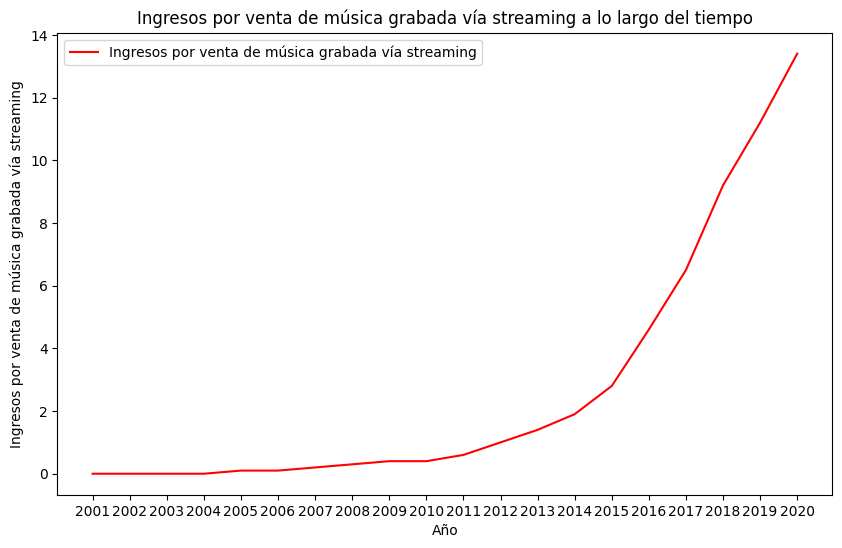

In [ ]:
# Ingresos por venta de música grabada vía streaming a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Ingresos por venta de música grabada vía streaming a lo largo del tiempo'
ax.plot(ingresos_ventas_musica_streaming['indice_tiempo'], ingresos_ventas_musica_streaming['ingresos_ventas_musica_streaming'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos por venta de música grabada vía streaming')
plt.title('Ingresos por venta de música grabada vía streaming a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(ingresos_ventas_musica_streaming['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Ingresos por venta de música grabada vía streaming'])

# Mostrar el gráfico
plt.show()

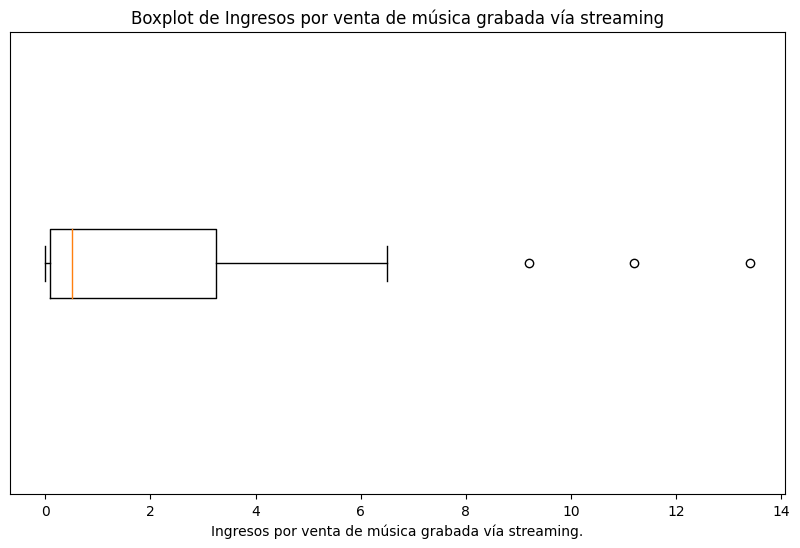

In [ ]:
# Boxplot de los Ingresos por venta de música grabada vía streaming:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(ingresos_ventas_musica_streaming['ingresos_ventas_musica_streaming'], vert=False)

# Etiquetas
plt.title('Boxplot de Ingresos por venta de música grabada vía streaming')
plt.xlabel('Ingresos por venta de música grabada vía streaming.')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_ventas_musica_streaming['ingresos_ventas_musica_streaming'].describe()

count    20.000000
mean      2.705000
std       4.116395
min       0.000000
25%       0.100000
50%       0.500000
75%       3.250000
max      13.400000
Name: ingresos_ventas_musica_streaming, dtype: float64

Observando el grafico de linea:

* Se puede ver que el comportamiento de los ingresos fue durante toda la serie en aumento. En el transcurso del periodo de 2001-2012 llego de 0 a 1 bill USD, en el periodo de 2012-2015 se nota una velocidad de aumento aun mayor y a partir de 2015 a 2020 es donde se ve el mayor crecimiento.

Observando el boxplot:

* Se ven 3 valores atipicos que corresponden a los ultimos 3 años (2018, 2019, 2020).

Observando las medidas resumen:

* El maximo valor de la serie corresponde al ultimo año donde los ingresos fueron de 13.4 bill USD y el minimo a los 4 primeros años donde no hubo ingresos por streaming.

* El 75% de las observaciones son menores o iguales a 3.25 bill USD (exactamente son menores o iguales a 2.8 bill USD) y el 25% restante estan comprendidas entre 3.25 y 13.4 bill USD (exactamente entre 2.8 y 13.4) lo que denota una bastante mayor dispersion de los datos en los ultimos 5 años, signo tambien de un mayor crecimiento si tenemos en cuenta que siempre se mantuvieron en aumento.



### Variable: ingresos_ventas_musica_descargas

In [ ]:
ingresos_ventas_musica_descargas = musica[['indice_tiempo', 'ingresos_ventas_musica_descargas']]
ingresos_ventas_musica_descargas

,indice_tiempo,ingresos_ventas_musica_descargas
0,2001,0.0
1,2002,0.0
2,2003,0.0
3,2004,0.4
4,2005,1.0
5,2006,2.0
6,2007,2.7
7,2008,3.4
8,2009,3.7
9,2010,3.9


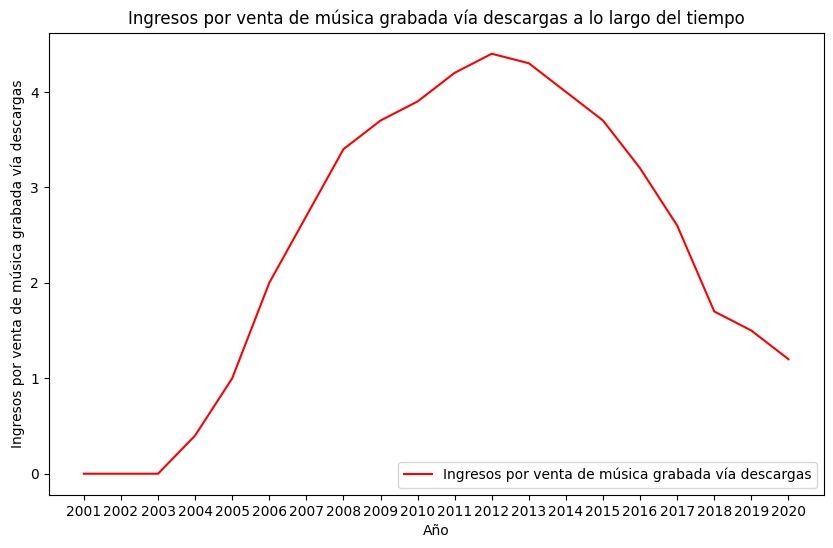

In [ ]:
# Ingresos por venta de música grabada vía descargas a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Ingresos por venta de música grabada vía descargas a lo largo del tiempo'
ax.plot(ingresos_ventas_musica_descargas['indice_tiempo'], ingresos_ventas_musica_descargas['ingresos_ventas_musica_descargas'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos por venta de música grabada vía descargas')
plt.title('Ingresos por venta de música grabada vía descargas a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(ingresos_ventas_musica_descargas['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Ingresos por venta de música grabada vía descargas'])

# Mostrar el gráfico
plt.show()

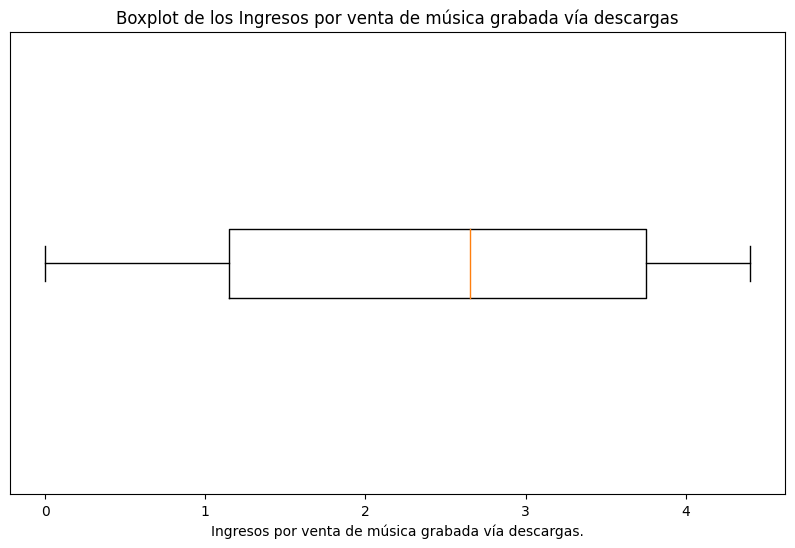

In [ ]:
# Boxplot de los Ingresos por venta de música grabada vía descargas:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(ingresos_ventas_musica_descargas['ingresos_ventas_musica_descargas'], vert=False)

# Etiquetas
plt.title('Boxplot de los Ingresos por venta de música grabada vía descargas')
plt.xlabel('Ingresos por venta de música grabada vía descargas.')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_ventas_musica_descargas['ingresos_ventas_musica_descargas'].describe()

count    20.00000
mean      2.39500
std       1.57195
min       0.00000
25%       1.15000
50%       2.65000
75%       3.75000
max       4.40000
Name: ingresos_ventas_musica_descargas, dtype: float64

* Se observa un crecimiento de los ingresos año tras año hasta el 2012 a partir del cual los ingresos empiezan a decrecer año a año hasta el ultimo de la serie.

* A partir de 2018 los ingresos empiezan a decaer con menor velocidad.

*   No se observan valores atipicos valores atipicos.

*   El valor maximo es de 4.4 bill USD que corresponde al año 2012, el minimo es 0 USD relativo a los primeros 3 años de la serie.

### Variable: ingresos_ventas_musica_formato_fisico

In [ ]:
ingresos_ventas_musica_formato_fisico = musica[['indice_tiempo', 'ingresos_ventas_musica_formato_fisico']]
ingresos_ventas_musica_formato_fisico

,indice_tiempo,ingresos_ventas_musica_formato_fisico
0,2001,23.0
1,2002,21.3
2,2003,19.7
3,2004,19.1
4,2005,17.9
5,2006,16.2
6,2007,14.0
7,2008,11.9
8,2009,10.3
9,2010,8.9


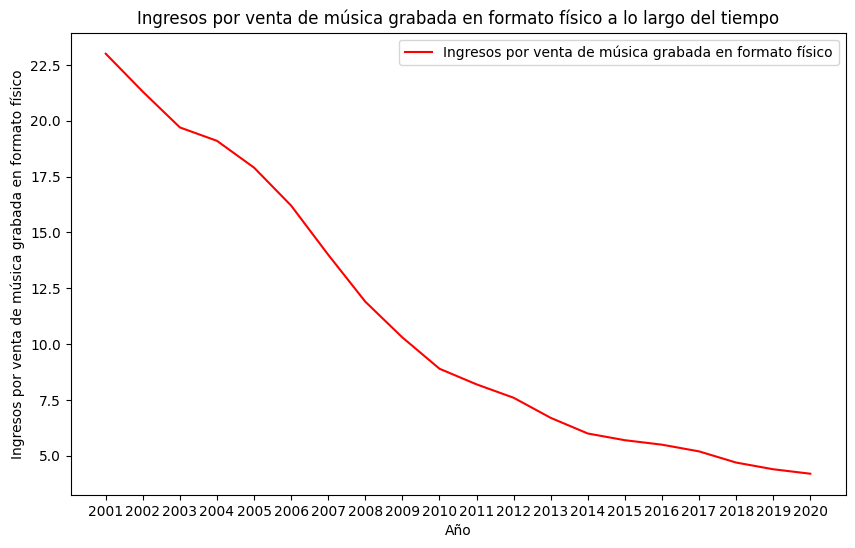

In [ ]:
# Ingresos por venta de música grabada en formato físico a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Ingresos por venta de música grabada en formato físico a lo largo del tiempo'
ax.plot(ingresos_ventas_musica_formato_fisico['indice_tiempo'], ingresos_ventas_musica_formato_fisico['ingresos_ventas_musica_formato_fisico'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos por venta de música grabada en formato físico')
plt.title('Ingresos por venta de música grabada en formato físico a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(ingresos_ventas_musica_formato_fisico['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Ingresos por venta de música grabada en formato físico'])

# Mostrar el gráfico
plt.show()

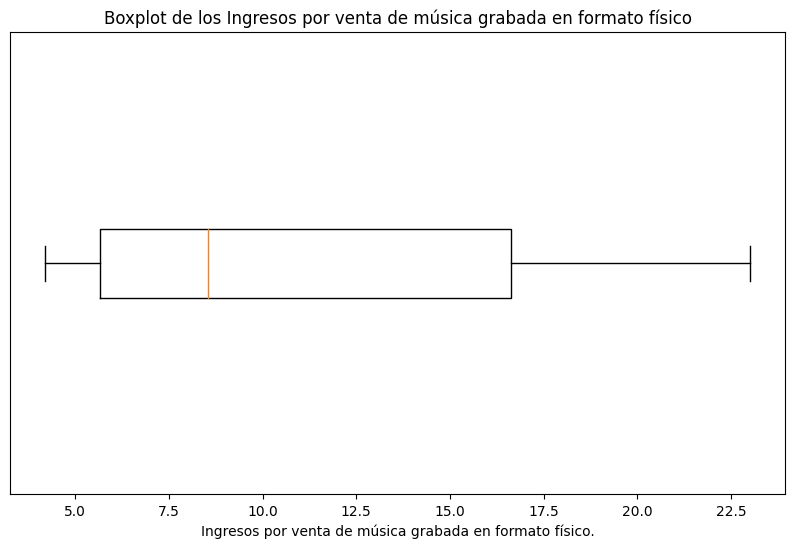

In [ ]:
# Boxplot de los Ingresos por venta de música grabada en formato físico:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(ingresos_ventas_musica_formato_fisico['ingresos_ventas_musica_formato_fisico'], vert=False)

# Etiquetas
plt.title('Boxplot de los Ingresos por venta de música grabada en formato físico')
plt.xlabel('Ingresos por venta de música grabada en formato físico.')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_ventas_musica_formato_fisico['ingresos_ventas_musica_formato_fisico'].describe()

count    20.00000
mean     11.02500
std       6.34573
min       4.20000
25%       5.65000
50%       8.55000
75%      16.62500
max      23.00000
Name: ingresos_ventas_musica_formato_fisico, dtype: float64

In [ ]:
ingresos_ventas_musica_formato_fisico['ingresos_ventas_musica_formato_fisico'].max() - ingresos_ventas_musica_formato_fisico['ingresos_ventas_musica_formato_fisico'].min()

18.8

*   Observando el grafico de lineas de la serie temporal se observa que durante cada año del periodo 2001-2020 las ventas de musica en formato fisico decrecieron con respecto al año anterior.

*   Este decrecimiento continuo no fue siempre con la misma intensidad. Observando un poco el boxplot y las medidas resumen podemos ver una mayor dispersion de los datos en los valores altos, el maximo valor es de 23 bill USD y el 2do cuartil se encuentra en 8.55 bill USD esto quiere decir que en los primeros 10 años los ingresos cayeron de 23 a 8.55, y en los ultimos 10 años de la serie de 8.55 al minimo que es 4.2. Es decir que en la primera decada cayeron con mayor intensidad que en la segunda.

*   No se observan valores atipicos.

*   El rango es de 18.8 (todos los valores estan dispersos entre 4.2 y 23).



### Variable: ingresos_derechos_comunicacion_publica

In [ ]:
ingresos_derechos_comunicacion_publica = musica[['indice_tiempo', 'ingresos_derechos_comunicacion_publica']]
ingresos_derechos_comunicacion_publica

,indice_tiempo,ingresos_derechos_comunicacion_publica
0,2001,0.6
1,2002,0.7
2,2003,0.8
3,2004,0.9
4,2005,0.9
5,2006,1.0
6,2007,1.2
7,2008,1.2
8,2009,1.3
9,2010,1.4


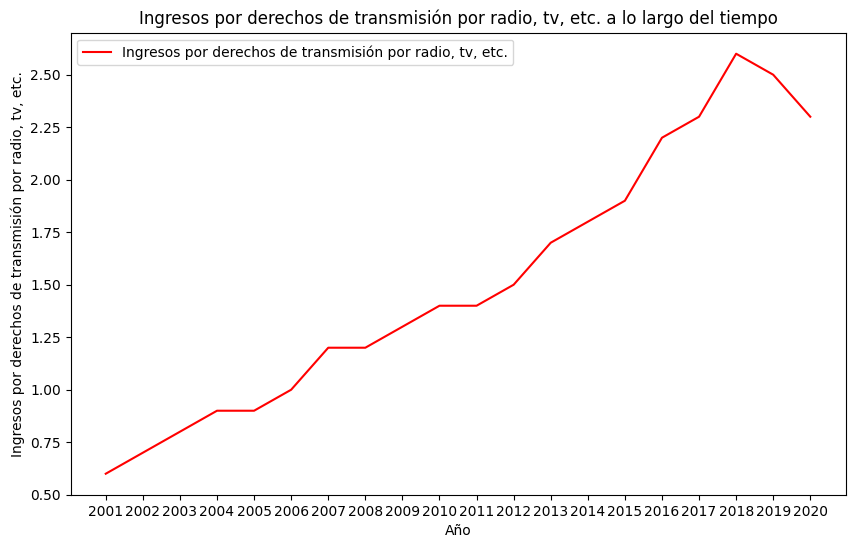

In [ ]:
# Ingresos por derechos de transmisión por radio, tv, etc. a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Ingresos por derechos de transmisión por radio, tv, etc. a lo largo del tiempo'
ax.plot(ingresos_derechos_comunicacion_publica['indice_tiempo'], ingresos_derechos_comunicacion_publica['ingresos_derechos_comunicacion_publica'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos por derechos de transmisión por radio, tv, etc.')
plt.title('Ingresos por derechos de transmisión por radio, tv, etc. a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(ingresos_derechos_comunicacion_publica['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Ingresos por derechos de transmisión por radio, tv, etc.'])

# Mostrar el gráfico
plt.show()

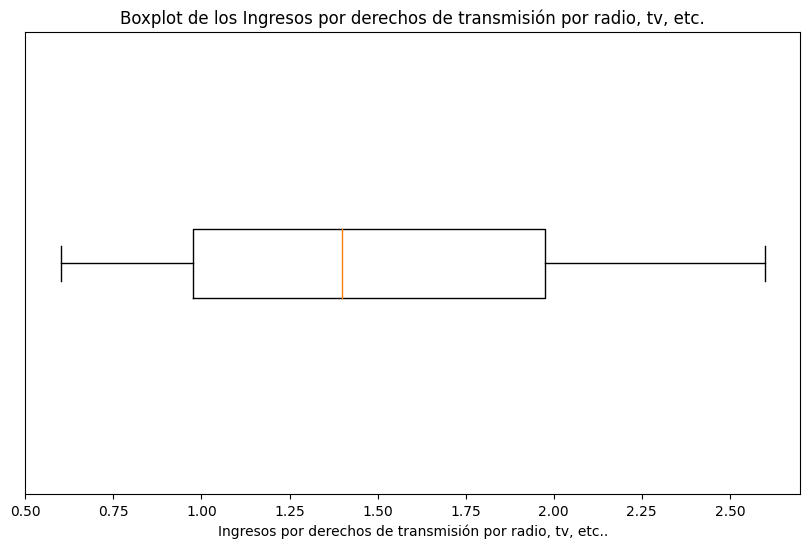

In [ ]:
# Boxplot de los Ingresos por derechos de transmisión por radio, tv, etc.:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(ingresos_derechos_comunicacion_publica['ingresos_derechos_comunicacion_publica'], vert=False)

# Etiquetas
plt.title('Boxplot de los Ingresos por derechos de transmisión por radio, tv, etc.')
plt.xlabel('Ingresos por derechos de transmisión por radio, tv, etc..')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_derechos_comunicacion_publica['ingresos_derechos_comunicacion_publica'].describe()

count    20.000000
mean      1.510000
std       0.624837
min       0.600000
25%       0.975000
50%       1.400000
75%       1.975000
max       2.600000
Name: ingresos_derechos_comunicacion_publica, dtype: float64

In [ ]:
# Rango:
ingresos_derechos_comunicacion_publica['ingresos_derechos_comunicacion_publica'].max() - ingresos_derechos_comunicacion_publica['ingresos_derechos_comunicacion_publica'].min()

2.0

*   Durante cada año del periodo 2001-2018 los ingresos por derechos de comunicacion publica o crecieron o se mantuvieron igual con respecto al año anterior hasta que llega el año 2018 donde empieza a ocurrir lo contrario, los ingresos comienzan a descender hasta el fin de la serie.

*   No se observan valores atipicos.

*   El minimo valor es de 0.6 bill USD y es del primer año de la serie. El maximo valor es de 2.6 bill USD y le corresponde al 2018 (punto a partir de cual empiezan a descender los ingresos).

*   El rango es de 2 (todos los valores estan dispersos entre 0.6 y 2.6).


### Variable: ingresos_contratos_sincronizacion

In [ ]:
ingresos_contratos_sincronizacion = musica[['indice_tiempo', 'ingresos_contratos_sincronizacion']]
ingresos_contratos_sincronizacion

,indice_tiempo,ingresos_contratos_sincronizacion
0,2001,0.0
1,2002,0.0
2,2003,0.0
3,2004,0.0
4,2005,0.0
5,2006,0.0
6,2007,0.0
7,2008,0.0
8,2009,0.0
9,2010,0.3


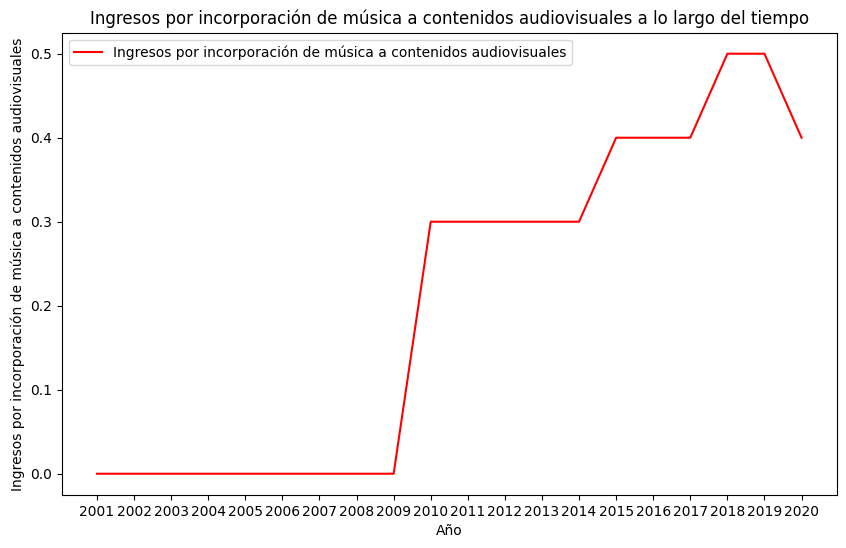

In [ ]:
# Ingresos por incorporación de música a contenidos audiovisuales a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Ingresos por incorporación de música a contenidos audiovisuales a lo largo del tiempo'
ax.plot(ingresos_contratos_sincronizacion['indice_tiempo'], ingresos_contratos_sincronizacion['ingresos_contratos_sincronizacion'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Ingresos por incorporación de música a contenidos audiovisuales')
plt.title('Ingresos por incorporación de música a contenidos audiovisuales a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(ingresos_contratos_sincronizacion['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Ingresos por incorporación de música a contenidos audiovisuales'])

# Mostrar el gráfico
plt.show()

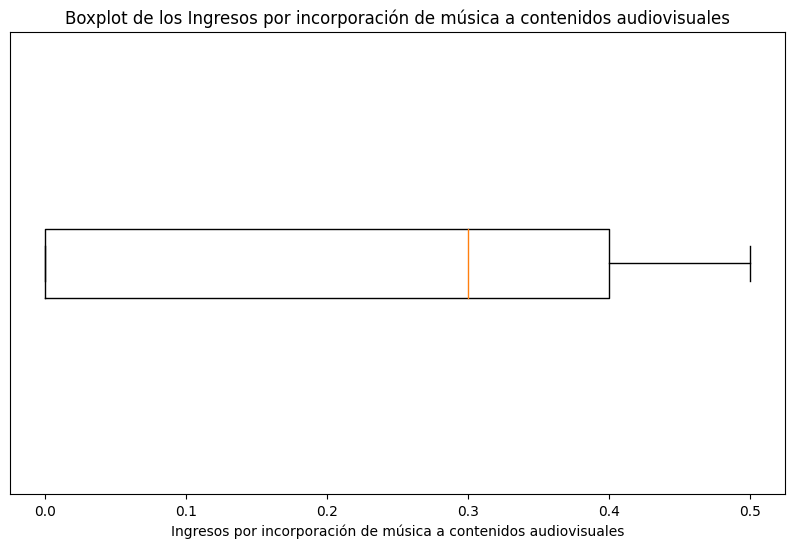

In [ ]:
# Boxplot de los Ingresos por incorporación de música a contenidos audiovisuales:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(ingresos_contratos_sincronizacion['ingresos_contratos_sincronizacion'], vert=False)

# Etiquetas
plt.title('Boxplot de los Ingresos por incorporación de música a contenidos audiovisuales')
plt.xlabel('Ingresos por incorporación de música a contenidos audiovisuales')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_contratos_sincronizacion['ingresos_contratos_sincronizacion'].describe()

count    20.000000
mean      0.205000
std       0.198614
min       0.000000
25%       0.000000
50%       0.300000
75%       0.400000
max       0.500000
Name: ingresos_contratos_sincronizacion, dtype: float64

*   Se ven basicamente 9 años donde no hubo ingresos por este medio.

*   Otra cosa que llama la atencion es el hecho de que una vez que un año crece luego tiende a estancarse en el mismo valor durante varios años.

*   Durante el periodo 2001-2019 siempre se mantuvo o crecio con respecto al año anterior, en 2020 se observa el primer año donde decrecio con respecto al anterior.

*   No se observan valores atipicos.

*   El boxplot no tiene bigote izquierdo debido a que el minimo se corresponde con el primer cuartil.

*   El minimo valor es de 0 bill USD y el maximo valor es de 0.5 bill USD. Todos los valores estan dispersos en un rango de 0.5 por lo que no hay demasiada dispersion de los datos.



### Variable: porcentaje_usuarios_internet

In [ ]:
porcentaje_usuarios_internet = musica[['indice_tiempo', 'porcentaje_usuarios_internet']]
porcentaje_usuarios_internet

,indice_tiempo,porcentaje_usuarios_internet
0,2001,8.05
1,2002,10.52
2,2003,12.20
3,2004,14.08
4,2005,15.67
5,2006,17.42
6,2007,20.35
7,2008,23.00
8,2009,25.55
9,2010,28.79


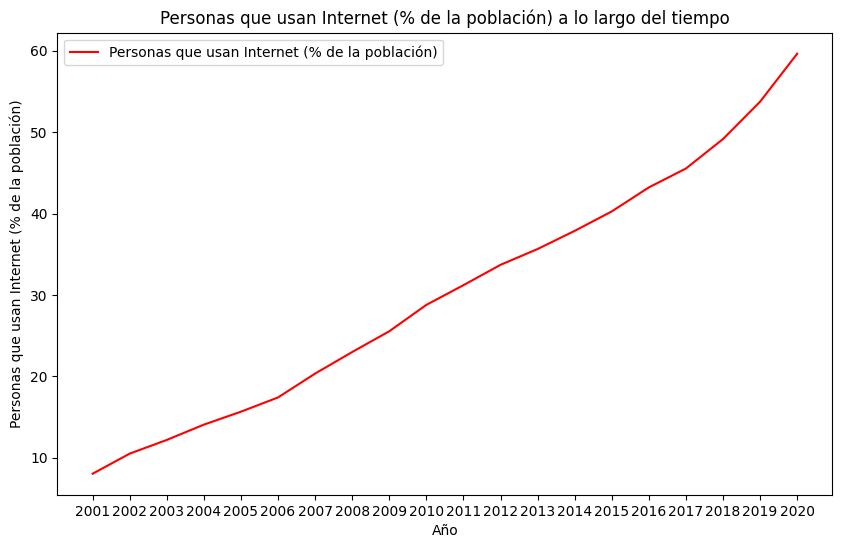

In [ ]:
# Personas que usan Internet (% de la población) a lo largo del tiempo:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Personas que usan Internet (% de la población) a lo largo del tiempo'
ax.plot(porcentaje_usuarios_internet['indice_tiempo'], porcentaje_usuarios_internet['porcentaje_usuarios_internet'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Personas que usan Internet (% de la población)')
plt.title('Personas que usan Internet (% de la población) a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(porcentaje_usuarios_internet['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Personas que usan Internet (% de la población)'])

# Mostrar el gráfico
plt.show()

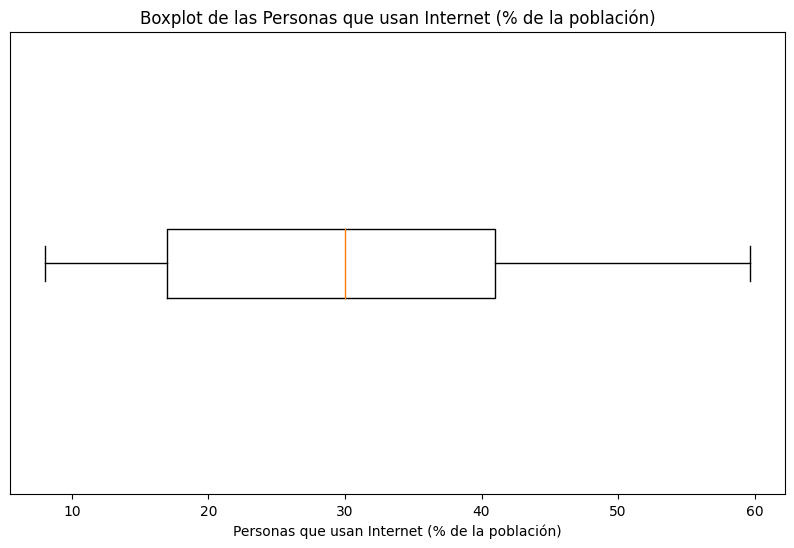

In [ ]:
# Boxplot de las Personas que usan Internet (% de la población):
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(porcentaje_usuarios_internet['porcentaje_usuarios_internet'], vert=False)

# Etiquetas
plt.title('Boxplot de las Personas que usan Internet (% de la población)')
plt.xlabel('Personas que usan Internet (% de la población)')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
porcentaje_usuarios_internet['porcentaje_usuarios_internet'].describe()

count    20.000000
mean     30.283000
std      15.213615
min       8.050000
25%      16.982500
50%      30.000000
75%      41.007500
max      59.640000
Name: porcentaje_usuarios_internet, dtype: float64

Observaciones:

*   El crecimiento de las personas que utilizan internet se mantiene a lo largo de los años. Incluso sobre los ultimos años crece aun mas rapido.

*   No se observan valores atipicos.

*   En toda la serie el porcentaje paso del 8.05% de la poblacion (minimo, en el primer año) al 59.64% (maximo, en el ultimo año).



### Variable: abonos_telefonia_movil

In [ ]:
abonos_telefonia_movil = musica[['indice_tiempo', 'abonos_telefonia_movil']]
abonos_telefonia_movil

,indice_tiempo,abonos_telefonia_movil
0,2001,960982997
1,2002,1164277513
2,2003,1415027798
3,2004,1760995437
4,2005,2205849896
5,2006,2745158819
6,2007,3368733569
7,2008,4028681041
8,2009,4636236426
9,2010,5295631563


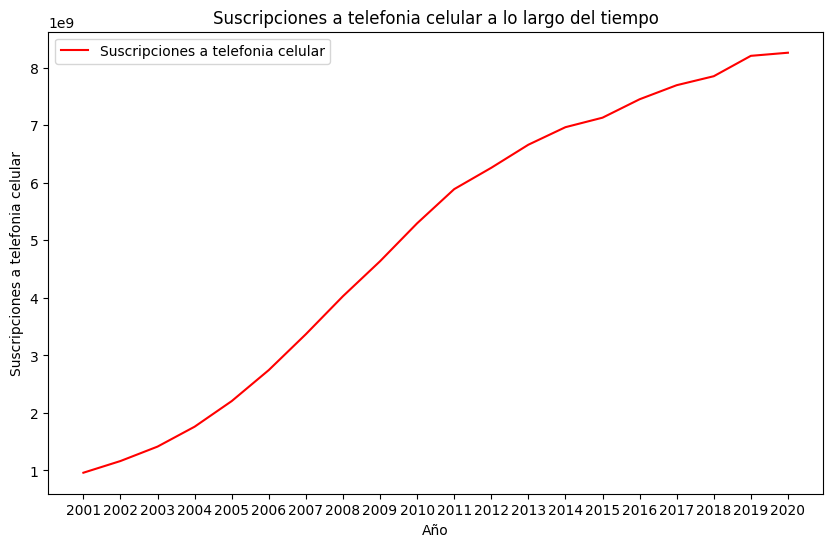

In [ ]:
# Suscripciones a telefonia celular:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Suscripciones a telefonia celular a lo largo del tiempo'
ax.plot(abonos_telefonia_movil['indice_tiempo'], abonos_telefonia_movil['abonos_telefonia_movil'], '-', color='red')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Suscripciones a telefonia celular')
plt.title('Suscripciones a telefonia celular a lo largo del tiempo')

# Configuracion personalizada del eje x
plt.xticks(abonos_telefonia_movil['indice_tiempo'])

# Mostrar Leyenda
plt.legend(['Suscripciones a telefonia celular'])

# Mostrar el gráfico
plt.show()

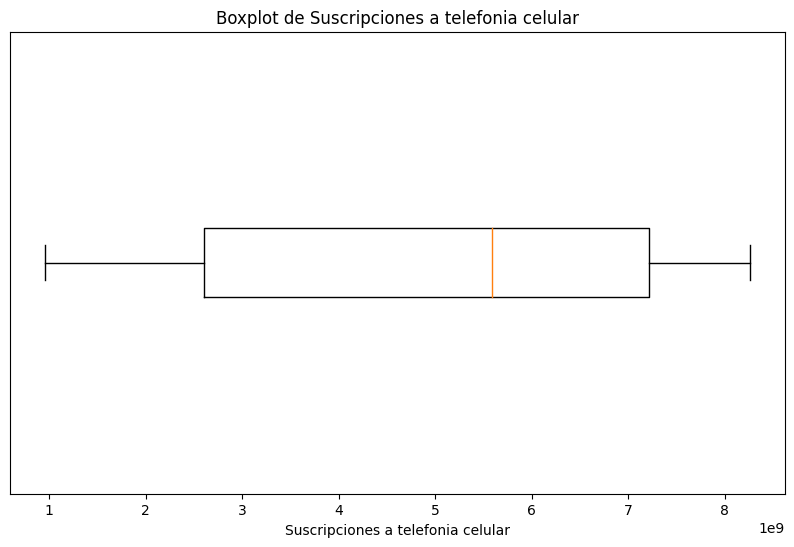

In [ ]:
# Boxplot de Suscripciones a telefonia celular:
fig = plt.figure(figsize=(10, 6))

# Crea una figura con un tamaño personalizado
plt.boxplot(abonos_telefonia_movil['abonos_telefonia_movil'], vert=False)

# Etiquetas
plt.title('Boxplot de Suscripciones a telefonia celular')
plt.xlabel('Suscripciones a telefonia celular')

# Elimina un 1 que aparece marcado en el eje y.
plt.yticks([])

# Mostrar el gráfico
plt.show()

In [ ]:
abonos_telefonia_movil['abonos_telefonia_movil'].describe()

count    2.000000e+01
mean     4.997936e+09
std      2.585032e+09
min      9.609830e+08
25%      2.610332e+09
50%      5.592664e+09
75%      7.211644e+09
max      8.260600e+09
Name: abonos_telefonia_movil, dtype: float64

Observaciones:

*   Se observa crecimiento durante toda la serie en cada año con respecto al anterior en las personas que tienen suscripciones a telefonia celular.

*   El crecimiento no es siempre el mismo, en el periodo 2001-2011 se observa un velocidad de crecimiento anual bastante mayor a la que hay en el periodo 2011-2019. Y en el periodo 2019-2020 se observa muy poco crecimiento.

*   No hay valores atipicos.

*   En un periodo de 20 años se paso de menos de un billon de suscripciones (minimo, en el primer año) a 8 billones (maximo, en el ultimo año)

# **Relaciones entre las distintas variables:**

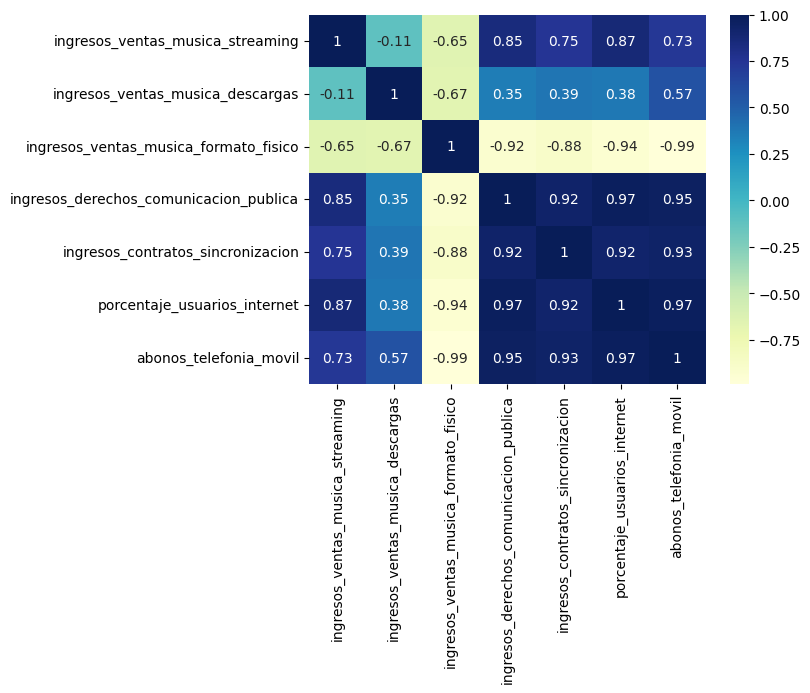

In [ ]:
# Grafico de matriz de correlaciones lineares:

corr_matrix = musica[['ingresos_ventas_musica_streaming',
            'ingresos_ventas_musica_descargas',
            'ingresos_ventas_musica_formato_fisico',
            'ingresos_derechos_comunicacion_publica',
            'ingresos_contratos_sincronizacion', 'porcentaje_usuarios_internet','abonos_telefonia_movil']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

plt.show()

> De la matriz de correlacion se pueden observar correlaciones lineales bastantes fuertes.

> Solo se graficara en diagramas de dispersiones las variables que seran utilizadas en la regresion lineal. Es decir de a pares la variable dependiente con cada una de sus variables independientes:




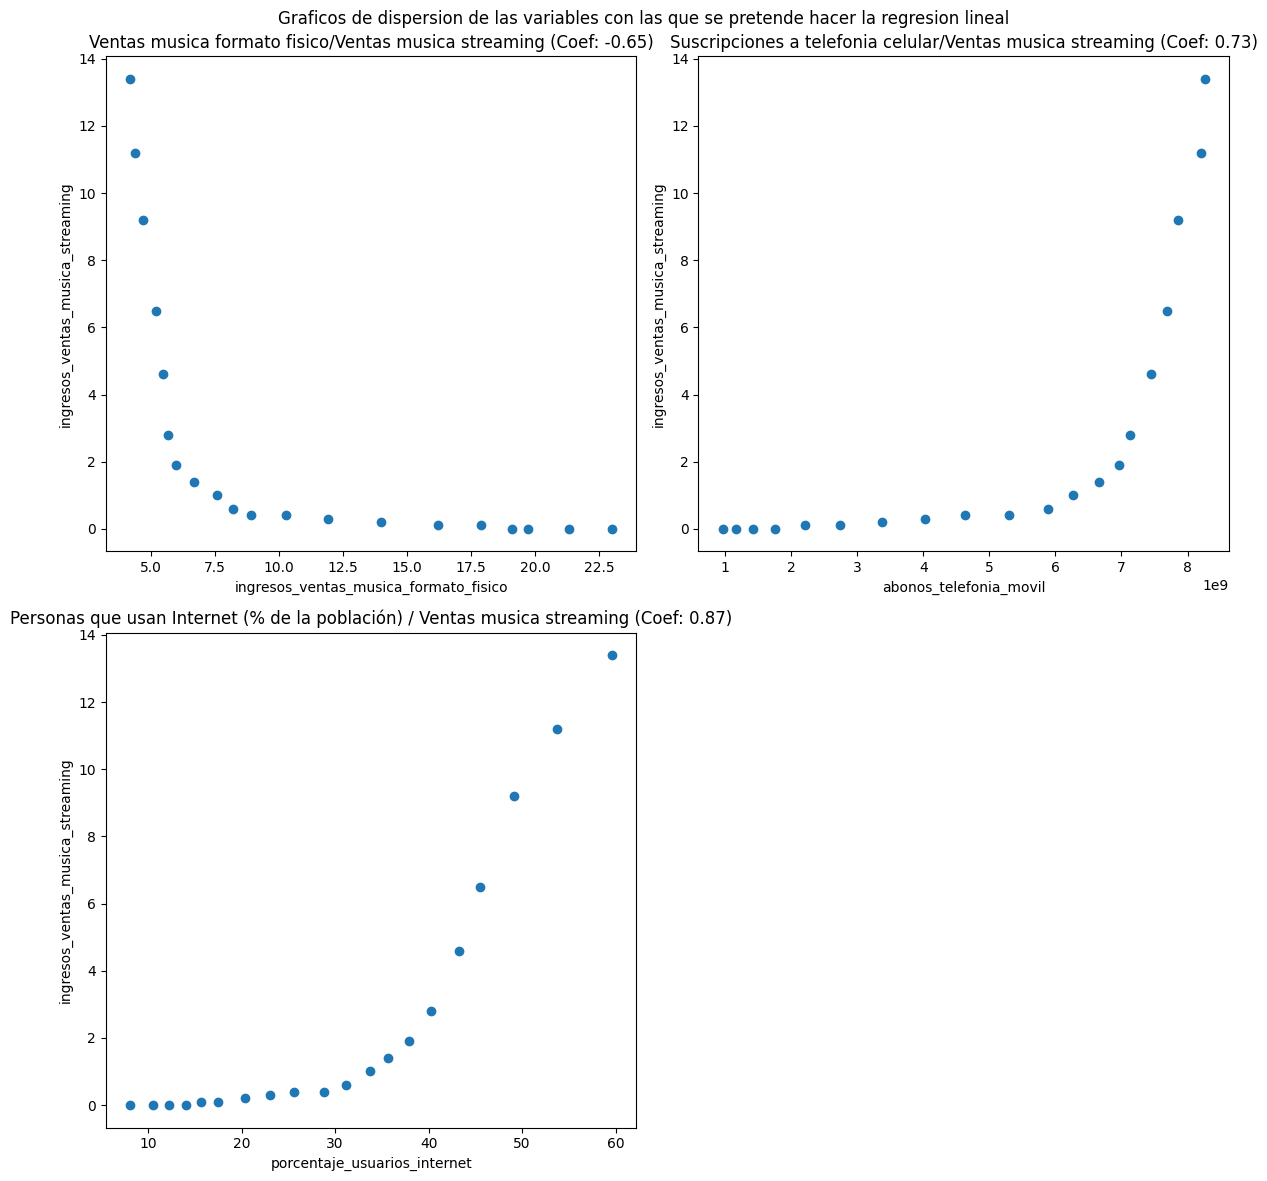

In [ ]:
# Crea una figura con subplots en un diseño de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Grafico de dispersión 1: Ingresos ventas musica streaming y Ingresos ventas musica formato fisico
ax1 = axes[0, 0]
ax1.scatter(musica['ingresos_ventas_musica_formato_fisico'], musica['ingresos_ventas_musica_streaming'])
ax1.set_xlabel('ingresos_ventas_musica_formato_fisico')
ax1.set_ylabel('ingresos_ventas_musica_streaming')
ax1.set_title('Ventas musica formato fisico/Ventas musica streaming (Coef: -0.65)')

# Grafico de dispersión 2: Suscripciones a telefonia celular y Ingresos ventas musica formato fisico
ax2 = axes[0, 1]
ax2.scatter(musica['abonos_telefonia_movil'], musica['ingresos_ventas_musica_streaming'])
ax2.set_xlabel('abonos_telefonia_movil')
ax2.set_ylabel('ingresos_ventas_musica_streaming')
ax2.set_title('Suscripciones a telefonia celular/Ventas musica streaming (Coef: 0.73)')

# Grafico de dispersión 3: Personas que usan Internet (% de la población) y Ingresos ventas musica formato fisico
ax3 = axes[1, 0]
ax3.scatter(musica['porcentaje_usuarios_internet'], musica['ingresos_ventas_musica_streaming'])
ax3.set_xlabel('porcentaje_usuarios_internet')
ax3.set_ylabel('ingresos_ventas_musica_streaming')
ax3.set_title('Personas que usan Internet (% de la población) / Ventas musica streaming (Coef: 0.87)')

# Eliminar el cuarto gráfico
fig.delaxes(axes[1, 1])

# Título general de la figura
fig.suptitle('Graficos de dispersion de las variables con las que se pretende hacer la regresion lineal')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# **Sobre la hipotesis inicial luego del analisis exploratorio y de las correlaciones:**

> Se puede observar un coeficiente de correlacion de moderado a fuerte entre las variables independientes y la variable dependiente.

> Pero en los graficos de dispersion se observa que el comportamiento no es similar a una recta, salvo por partes.

> Respecto a las variables independientes:

* 'abonos_telefonia_movil': Se pudo ver como esta variable fue aumentando a lo largo del tiempo al mismo tiempo que lo hacian los ingresos por las ventas en formato streaming.

* 'porcentaje_usuarios_internet': Se pudo ver como a medida que el acceso a internet aumentaba, las ventas en formato streaming tambien aumentaban.

> Respecto a la regresion lineal:

* Como dijimos anteriormente se espera que tanto cuando se incremente 'porcentaje_usuarios_internet' como cuando aumente 'abonos_telefonia_movil' aumente 'ingresos_ventas_musica_streaming'.

# **Regresion lineal multiple:**

In [ ]:
# Creacion del modelo
mod_multiple = smf.ols(formula='ingresos_ventas_musica_streaming ~ abonos_telefonia_movil + porcentaje_usuarios_internet', data=musica)

# Ajuste del modelo
res_multiple = mod_multiple.fit()

# Resultado del modelo
print(res_multiple.summary())

                                   OLS Regression Results                                   
Dep. Variable:     ingresos_ventas_musica_streaming   R-squared:                       0.976
Model:                                          OLS   Adj. R-squared:                  0.973
Method:                               Least Squares   F-statistic:                     344.0
Date:                              Fri, 07 Jul 2023   Prob (F-statistic):           1.77e-14
Time:                                      20:49:50   Log-Likelihood:                -18.914
No. Observations:                                20   AIC:                             43.83
Df Residuals:                                    17   BIC:                             46.82
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                   coef    std err          t      P>|

>    A la hora de interpretar los coefientes del modelo se puede ver que:

* Llama la atencion 'abonos_telefonia_movil', que nos indica que (manteniendo constantes el resto de los coeficientes) a medida que aumentamos en una unidad los abonos de telefonia movil 'ingresos_ventas_musica_streaming' disminuye en -3.118e-09 bill USD. Esto no tiene sentido viendo el analisis exploratorio y de correlaciones anteriormente visto. Ya que un aumento de los abonos_telefonia_movil deberia hacer aumentar los ingresos por streaming.

*Por consultas realizadas con los profesores y busqueda en internet de los motivos que podian causar esto se dio con un fenomeno llamado "multicolinealidad" que se da cuando las variables independientes en una regresión lineal tienen una correlación lineal alta entre ellas, algo que ocurre en este caso ya que 'abonos_telefonia_movil' y 'porcentaje_usuarios_internet' tienen un coeficiente de correlacion de 0.97 (muy cercano a 1, demasiado alto).*

*Esto puede causar problemas en la interpretación de los coeficientes de regresión por varias razones. Entre ellas el hecho de que cuando las variables independientes están altamente correlacionadas, se vuelve difícil determinar el efecto individual de cada variable sobre la variable dependiente.*

*Los coeficientes de regresión se calculan asumiendo que las variables son independientes entre sí, por lo que cuando hay multicolinealidad, los coeficientes pueden reflejar la influencia conjunta de las variables en lugar de su efecto individual.*

En este caso es dificil hacer una correcta interpretacion de los coeficientes de la regresion lineal.

> POSIBLES SOLUCIONES:

* Eliminar las variables con alta correlacion (nos quedaria solo una variable independiente).

* Utilizar otras tecnicas de regresion.

* Elegir variables independientes sin una alta correlacion entre ellas.

> Debido al dataset que tenemos y las variables con las que contamos se decide realizar dos modelos de regresion lineal simple. Ya que no vimos otras tecnicas de regresion ni tampoco contamos con otras variables dentro del dataset que tengan sentido utilizar.

# **Regresion lineal simple 1:**

> La primer regresion lineal simple tendra como dependediente a 'ingresos_ventas_musica_streaming' e independiente a 'abonos_telefonia_movil'

In [ ]:
mod_simple_1 = smf.ols(formula='ingresos_ventas_musica_streaming ~ abonos_telefonia_movil', data=musica)
res_simple_1 = mod_simple_1.fit()
print(res_simple_1.summary())

                                   OLS Regression Results                                   
Dep. Variable:     ingresos_ventas_musica_streaming   R-squared:                       0.532
Model:                                          OLS   Adj. R-squared:                  0.506
Method:                               Least Squares   F-statistic:                     20.44
Date:                              Fri, 07 Jul 2023   Prob (F-statistic):           0.000264
Time:                                      20:49:50   Log-Likelihood:                -48.577
No. Observations:                                20   AIC:                             101.2
Df Residuals:                                    18   BIC:                             103.1
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                             coef    std err          t      P>|t|    

> Interpretacion de los resultados:

* R2: como en este caso es una regresion lineal simple utilizamos el R2. Nos dio 0.532 esto quiere decir que el modelo explica un 53% de la variacion de la variable dependiente.

* P>|t|: vemos que ambas coeficientes son significativos ya que su probabilidad de haber obtenido un valor distinto de cero cuando en realidad debia ser 0 es menor a 0.5. Esto quiere decir que son buenos predictores para nuestra variable.

Coeficientes:

* Intercept = -3.0987. Este es el punto en el eje y cuando x es 0, es decir donde la recta corta al eje y.

* abonos_telefonia_movil =  1.161e-09 A medida que aumentamos en una unidad los chips de telefonia movil los ingresos en formato streaming aumentan en 1.161e-09. Es un numero demasiado pequeño.



In [ ]:
# Calcular las predicciones con nuestro modelo y los datos de abonos del dataset
predicciones_streaming_abono = res_simple_1.predict(musica['abonos_telefonia_movil'])

Text(0, 0.5, 'ingresos_ventas_musica_streaming')

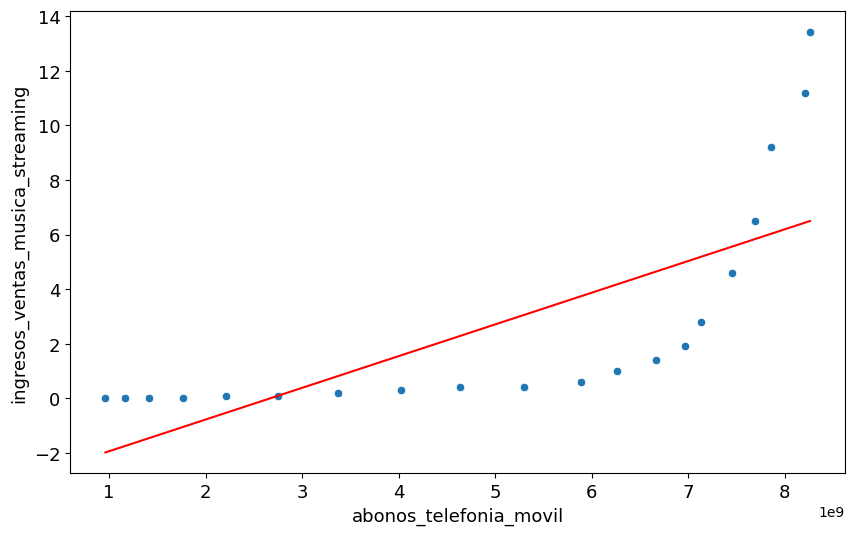

In [ ]:
# Grafico de dispersion mas predicciones:

plt.figure(figsize=(10,6))

sns.scatterplot(x='abonos_telefonia_movil',y='ingresos_ventas_musica_streaming', data = musica)

plt.plot(musica['abonos_telefonia_movil'], predicciones_streaming_abono, c = 'red')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('abonos_telefonia_movil',fontsize = 13)
plt.ylabel('ingresos_ventas_musica_streaming',fontsize = 13)

> Conclusiones sobre la primera regresion lineal simple:

* Si bien en este caso los coeficientes se comportaron como se esperaba y el p-value dio valores significativos se puede observar que las predicciones de nuestra regresion lineal no son las mas adecuadas salvo en las cercanias de algunos intervalos (por ejemplo cerca de 2.75 o de 7.5)

* Por lo tanto se concluye que con este dataset y para estas dos variables una regresion lineal simple no es el mejor tipo para predecir.

# **Regresion lineal simple 2:**

> La segunda regresion lineal simple tendra como dependediente a 'ingresos_ventas_musica_streaming' e independiente a 'porcentaje_usuarios_internet'

In [ ]:
mod_simple_2 = smf.ols(formula='ingresos_ventas_musica_streaming ~ porcentaje_usuarios_internet', data=musica)
res_simple_2 = mod_simple_2.fit()
print(res_simple_2.summary())

                                   OLS Regression Results                                   
Dep. Variable:     ingresos_ventas_musica_streaming   R-squared:                       0.754
Model:                                          OLS   Adj. R-squared:                  0.740
Method:                               Least Squares   F-statistic:                     55.10
Date:                              Fri, 07 Jul 2023   Prob (F-statistic):           7.00e-07
Time:                                      20:49:51   Log-Likelihood:                -42.151
No. Observations:                                20   AIC:                             88.30
Df Residuals:                                    18   BIC:                             90.29
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                   coef    std err          t      P>|

> Interpretacion de los resultados:

* R2 = 0.754 el modelo explica bastante mas que el anterior la variacion de la variable dependiente.

* P>|t|: ambos coeficientes son significativos.

Coeficientes:

* Intercept = -4.4088. Este es el punto en el eje y cuando x es 0, es decir donde la recta corta al eje y.

* porcentaje_usuarios_internet = 0.2349 a medida que aumentamos 1% la cantidad de usuario de internet los ingresos en formato streaming aumentan en 0.2349.


In [ ]:
# Calcular las predicciones con nuestro modelo y los datos de usuarios de internet del dataset
predicciones_streaming_internet = res_simple_2.predict(musica['porcentaje_usuarios_internet'])

Text(0, 0.5, 'ingresos_ventas_musica_streaming')

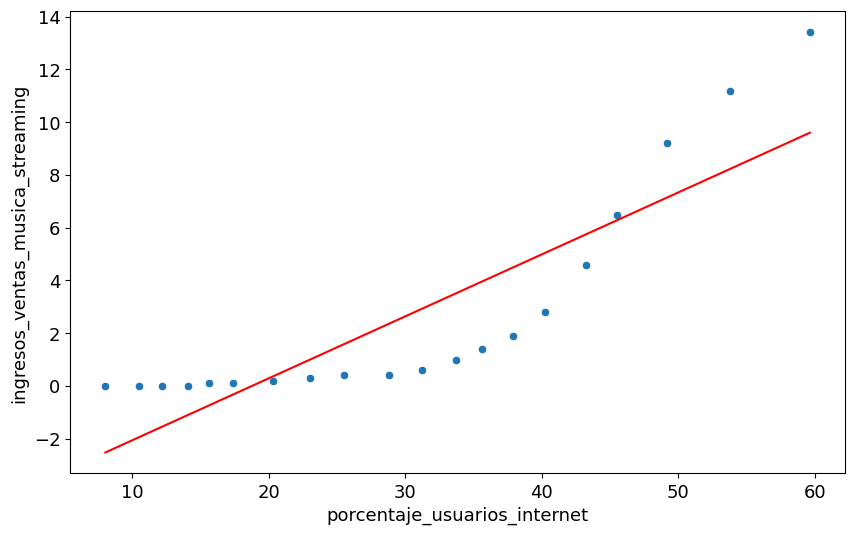

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='porcentaje_usuarios_internet', y='ingresos_ventas_musica_streaming', data = musica)

plt.plot(musica['porcentaje_usuarios_internet'], predicciones_streaming_internet, c = 'red')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('porcentaje_usuarios_internet',fontsize = 13)
plt.ylabel('ingresos_ventas_musica_streaming',fontsize = 13)

> Conclusiones sobre la segunda regresion lineal simple:

* Los coeficientes se comportaron como se esperaba nuevamente y el p-value dio valores significativos e incluso hubo un R cuadrado mas alto pero otra vez las predicciones de nuestra regresion lineal no son las mas adecuadas a la realidad salvo en las cercanias de algunos intervalos (por ejemplo cerca del 20% o del 45%)

* Nuevamente, con este dataset y para estas dos variables, una regresion lineal simple no es el mejor tipo para predecir.

# **Conclusiones finales:**



> El dataset elegido no fue el mas adecuado para hacer una regresion lineal (ya sea simple o multiple) por dos motivos:

* En primer lugar el problema de la multicolinealdiad que se pudo ver en la regresion lineal multiple.

* En segundo lugar, que se pudo ver en las regresiones lineales simples, la recta que mejor se ajusta a nuestro set de datos no resulta una buena manera de predecir el comportamiento de los mismos.


> No se estandarizaron los datos debido a que la regresion lineal multiple no funciono como se esperaba, por lo que no se justifica transformarlos para realizar la comparacion de cual de las variables tuvo mas peso en la regresion.